# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [73]:
A = integer_spiral(6)
print(A)

[[ 0. 36. 35. 34. 33. 32.]
 [ 0. 17. 16. 15. 14. 13.]
 [ 0. 18.  5.  4.  3. 12.]
 [ 0. 19.  6.  1.  2. 11.]
 [ 0. 20.  7.  8.  9. 10.]
 [ 0. 21. 22. 23. 24. 25.]]


In [74]:

def integer_spiral_numpy(n):
    #není lichá N 
    if n % 2 == 0:
        raise ValueError("není liché n");
    # vytvoříme výstupní matici 
    A = np.zeros((n,n))
    # střed 
    crow = n//2 
    ccol = n//2 
    A[crow, ccol] = 1
    # kruhy 
    for ring in range(0,n//2):
        #print(ring)
        filled = (2*ring+1)**2
        base_range = np.arange(filled + 1, filled + 2*(ring+1) + 1 )
        diag_off = ring+1
        #print(base_range)
        # vlevo (dolu -> nahoru)
        A[crow-ring-1:crow+ring+1,ccol+ring+1] = base_range[::-1]
        # nahoře (zprava -> doleva)
        A[crow-ring-1, ccol-ring-1:ccol+ring+1] = base_range[::-1] + 2*(ring+1)
        # vpravo (shora -> dolu)
        A[crow-ring:crow+ring+2,ccol-ring-1] = base_range + 4*(ring+1)
        # dole (zleva -> doprava)
        A[crow+ring+1, ccol-ring:ccol+ring+2] = base_range + 6*(ring+1)

    #vrať ho 
    return A

print(integer_spiral_numpy(7))

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [75]:
%%timeit 

integer_spiral_numpy(101)

312 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%%timeit

integer_spiral(101)

12.1 ms ± 80.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Zkouška pro n = 10001.

- Numpy metoda => 1.12 s +- 5.58 ms (celkem 8.9s)
- Metoda ze zadani => celkem >= 4 minuty

Zkouška pro n = 1001.

- Numpy metoda => 6.6 ms +- 76 us (celkem 5.3s)
- Metoda ze zadani => 1.27 s +- 6.39 ms (celkem 10s)

Zkouška pro n = 101.

- Numpy metoda => 318 us +- 1.76 us (celkem 2.5s)
- Metoda ze zadani => 12.3 ms +- 194 us (celkem 9.9s)

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
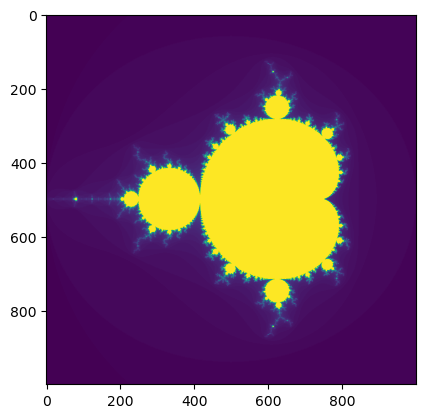

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [93]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    #divergenční matice 
    divergence = np.zeros((n,n), dtype=np.int32)
    #matice stavu 
    state = np.zeros((n,n), dtype=np.complex256)
    #matice C komplexních čísel   
    x = np.linspace(x_min, x_max, n, dtype=np.complex256).reshape((1,n))
    y = np.linspace(y_min, y_max, n, dtype=np.complex256).reshape((n,1)) * 1j
    c_matrix = x + y
    #udělej iterace 
    for i in range(k):
        if i % 5 == 0:
            print(f"{i}/{k}")
        #udělej jednu iteaci 
        state **= 2
        state += c_matrix
        #přičti iteraci 
        divergence[np.abs(state) <= 2] += 1
    #vrať počet operací
    return divergence

0/10
5/10


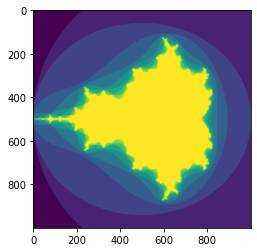

In [94]:
n = 1000
k = 10

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [95]:
def julia_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, c = 0.5+0.5j, n = 1000, k = 100):
    #divergenční matice 
    divergence = np.zeros((n,n), dtype=np.int32)
    #matice počátečního stavu komplexních čísel   
    x = np.linspace(x_min, x_max, n, dtype=np.complex256).reshape((1,n))
    y = np.linspace(y_min, y_max, n, dtype=np.complex256).reshape((n,1)) * 1j
    state = x + y
    #udělej iterace 
    for i in range(k):
        if i % 5 == 0:
            print(f"{i}/{k}")
        #udělej jednu iteaci 
        state **= 2
        state += c
        #přičti iteraci 
        divergence[np.abs(state) <= 2] += 1
    #vrať počet operací
    return divergence

0/100
5/100
10/100


/tmp/ipykernel_6518/3928704027.py:13: RuntimeWarning: overflow encountered in square
  state **= 2
/tmp/ipykernel_6518/3928704027.py:13: RuntimeWarning: invalid value encountered in square
  state **= 2
/tmp/ipykernel_6518/3928704027.py:16: RuntimeWarning: overflow encountered in absolute
  divergence[np.abs(state) <= 2] += 1


15/100
20/100
25/100
30/100
35/100
40/100
45/100
50/100
55/100
60/100
65/100
70/100
75/100
80/100
85/100
90/100
95/100


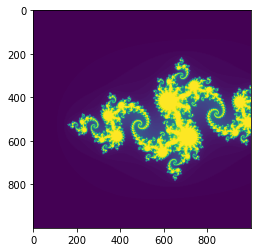

In [98]:
n = 1000
k = 100

divergence_matrix = julia_set(n=n, k=k, c=-0.8+0.156j)
plt.imshow(divergence_matrix)